In [2]:
import tensorflow as tf
import os
from pathlib import Path
import numpy as np
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import random
np.random.seed=42
img_hw = 128
img_c = 3


2025-03-07 16:42:29.688688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741353149.722329    9949 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741353149.734373    9949 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 16:42:29.787194: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
inputs = tf.keras.layers.Input((img_hw,img_hw,img_c))
norm = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(norm)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1,(1,1), activation='sigmoid')(c9)
model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


I0000 00:00:1741353156.953898    9949 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4080 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        448 │ lambda[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ dropout_3[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
TRAIN_PATH = 'data/train/'
TEST_PATH = 'data/test/'
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS=3
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)  
            
    Y_train[n] = mask   

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img
print('done')

Resizing training images and masks


  0%|          | 0/670 [00:00<?, ?it/s]

100%|██████████| 670/670 [12:56<00:00,  1.16s/it]


Resizing test images


100%|██████████| 65/65 [00:02<00:00, 25.47it/s]

done


In [12]:

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("checkpoints/u-net.h5",monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3),
    tf.keras.callbacks.TensorBoard(log_dir='logs')]

model.fit(x=X_train,y=Y_train,batch_size=16,epochs=25,verbose=1,callbacks=callbacks)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)
I0000 00:00:1741355356.321421   10303 service.cc:148] XLA service 0x7f99ac0040c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741355356.322895   10303 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2025-03-07 17:19:16.538475: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741355357.409126   10303 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-07 17:19:19.035445: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,16,128

41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7116 - loss: 0.6343

2025-03-07 17:19:33.920276: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[14,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[14,3,128,128]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 17:19:34.011985: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[14,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[14,16,128,128]{3,2,1,0}, f32[16,16,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.7124 - loss: 0.6325

42/42 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.7131 - loss: 0.6308
Epoch 2/25
 3/42 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7479 - loss: 0.4198

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8038 - loss: 0.3534

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8064 - loss: 0.3504
Epoch 3/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9256 - loss: 0.1977

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9261 - loss: 0.1965
Epoch 4/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9471 - loss: 0.1398

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9470 - loss: 0.1400
Epoch 5/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9506 - loss: 0.1296

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9506 - loss: 0.1296
Epoch 6/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9534 - loss: 0.1217

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9534 - loss: 0.1216
Epoch 7/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9535 - loss: 0.1217

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9536 - loss: 0.1215
Epoch 8/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9557 - loss: 0.1203

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9558 - loss: 0.1200
Epoch 9/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9584 - loss: 0.1097

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9584 - loss: 0.1097
Epoch 10/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9608 - loss: 0.1026

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9607 - loss: 0.1028
Epoch 11/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9592 - loss: 0.1069

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9593 - loss: 0.1068
Epoch 12/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9644 - loss: 0.0917

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9643 - loss: 0.0922
Epoch 13/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9608 - loss: 0.1044

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9608 - loss: 0.1042
Epoch 14/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9624 - loss: 0.0946

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9624 - loss: 0.0947
Epoch 15/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9604 - loss: 0.1019

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9605 - loss: 0.1017
Epoch 16/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9625 - loss: 0.0977

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9625 - loss: 0.0975
Epoch 17/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9641 - loss: 0.0914

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9641 - loss: 0.0915
Epoch 18/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9621 - loss: 0.0949

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9622 - loss: 0.0949
Epoch 19/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9633 - loss: 0.0964

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9633 - loss: 0.0962
Epoch 20/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9648 - loss: 0.0940

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9648 - loss: 0.0937
Epoch 21/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9652 - loss: 0.0884

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9651 - loss: 0.0884
Epoch 22/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9675 - loss: 0.0835

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9675 - loss: 0.0836
Epoch 23/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9682 - loss: 0.0805

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9681 - loss: 0.0808
Epoch 24/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9651 - loss: 0.0869

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9651 - loss: 0.0869
Epoch 25/25
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9663 - loss: 0.0860

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9663 - loss: 0.0860


In [13]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)



 

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 128, 128, 3))
  warnings.warn(msg)
2025-03-07 17:23:00.754062: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,128,128]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 17:23:00.934252: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy

16/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

2025-03-07 17:23:03.743443: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[27,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[27,3,128,128]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 17:23:03.891193: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[27,16,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[27,16,128,128]{3,2,1,0}, f32[16,16,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAct

19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

2025-03-07 17:23:06.347693: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[3,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,32,32,32]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 17:23:06.385079: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[3,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationFor

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

2025-03-07 17:23:07.876030: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-07 17:23:07.929757: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[1,128,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,16,16]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivation

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


/tmp/ipykernel_9949/505393823.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(Y_train[ix]))


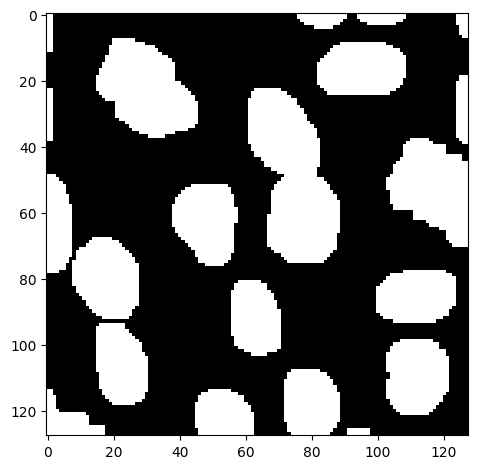

/tmp/ipykernel_9949/505393823.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(preds_train_t[ix]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


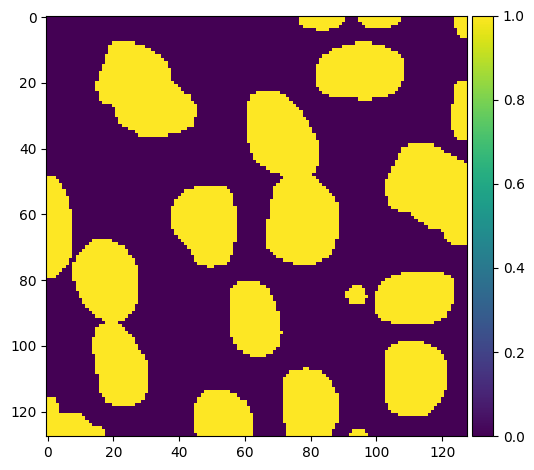

/tmp/ipykernel_9949/505393823.py:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(X_train[int(X_train.shape[0]*0.9):][ix])


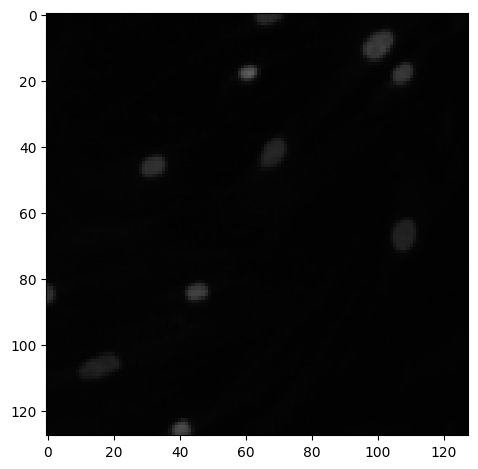

/tmp/ipykernel_9949/505393823.py:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))


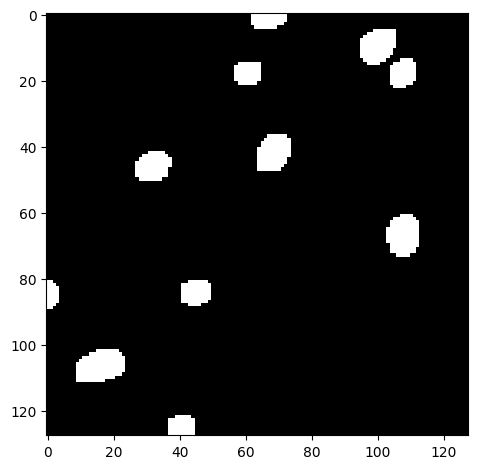

/tmp/ipykernel_9949/505393823.py:13: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.squeeze(preds_val_t[ix]))
/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


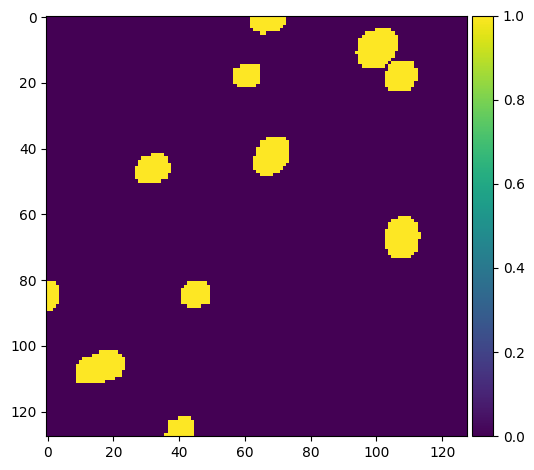

In [14]:
ix = random.randint(0, len(preds_test_t))
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()